In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.datasets import fashion_mnist

In [19]:
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

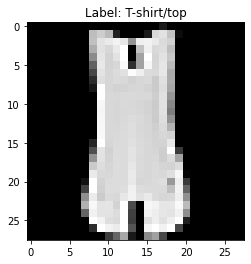

In [34]:
def show_image(image, label):

    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

    plt.imshow(image, cmap='gray') 
    plt.title(f"Label: {class_names[label]}")
    plt.show()

show_image(train_images[4], train_labels[4])


In [20]:
train_images = train_images / 255
test_images = test_images / 255

train_images = train_images[..., tf.newaxis]
test_images = test_images[..., tf.newaxis]

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential(layers=[
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

D:\Anaconda\envs\pytorch\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [22]:
history = model.fit(train_images, train_labels, epochs=8, validation_split=0.1)

Epoch 1/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.7438 - loss: 0.6989 - val_accuracy: 0.8722 - val_loss: 0.3595
Epoch 2/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8786 - loss: 0.3371 - val_accuracy: 0.8895 - val_loss: 0.3086
Epoch 3/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8964 - loss: 0.2827 - val_accuracy: 0.8922 - val_loss: 0.2898
Epoch 4/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9077 - loss: 0.2531 - val_accuracy: 0.9032 - val_loss: 0.2736
Epoch 5/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9185 - loss: 0.2234 - val_accuracy: 0.9092 - val_loss: 0.2520
Epoch 6/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9232 - loss: 0.2049 - val_accuracy: 0.9088 - val_loss: 0.2537
Epoch 7/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9299 - loss: 0.1883 - val_accuracy: 0.9005 - val_loss: 0.2691
Epoch 8/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9378 - loss: 0.1661 - 

In [23]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - 4ms/step - accuracy: 0.9087 - loss: 0.2627

Test accuracy: 0.9086999893188477


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


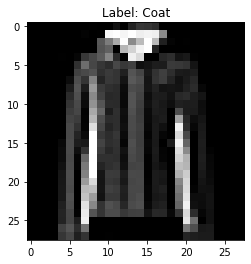

In [48]:
img_to_disp = test_images[6].reshape((28, 28, 1))
img_to_pred = test_images[6].reshape((1, 28, 28, 1))

pred = model.predict(img_to_pred)
predicted_label = np.argmax(pred)
show_image(img_to_disp,predicted_label)